In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def create_deep_nn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = create_deep_nn()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_gd = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7288 - accuracy: 0.8000 - val_loss: 0.3662 - val_accuracy: 0.9013
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3827 - accuracy: 0.8910 - val_loss: 0.2916 - val_accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3201 - accuracy: 0.9091 - val_loss: 0.2550 - val_accuracy: 0.9294
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2843 - accuracy: 0.9182 - val_loss: 0.2293 - val_accuracy: 0.9365
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9271 - val_loss: 0.2089 - val_accuracy: 0.9425
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2382 - accuracy: 0.9322 - val_loss: 0.1947 - val_accuracy: 0.9454
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2209 - accuracy: 0.9369 - val_loss: 0.1813 - val_accur

In [4]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1762 - accuracy: 0.9499 - val_loss: 0.1466 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1708 - accuracy: 0.9517 - val_loss: 0.1399 - val_accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1626 - accuracy: 0.9534 - val_loss: 0.1347 - val_accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1571 - accuracy: 0.9553 - val_loss: 0.1295 - val_accuracy: 0.9632
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1505 - accuracy: 0.9569 - val_loss: 0.1255 - val_accuracy: 0.9635
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1455 - accuracy: 0.9580 - val_loss: 0.1224 - val_accuracy: 0.9645
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1421 - accuracy: 0.9598 - val_loss: 0.1189 - val_accuracy:

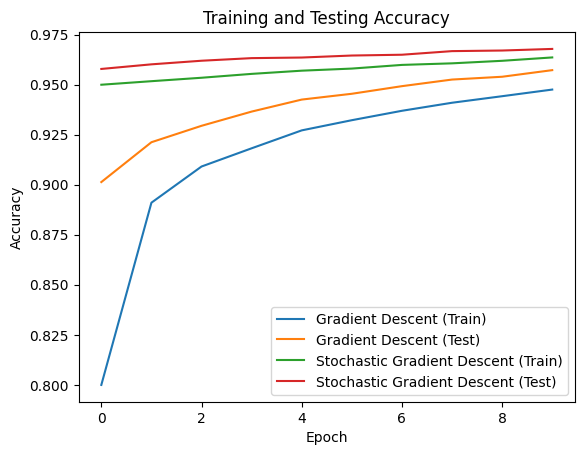

In [5]:
plt.plot(history_gd.history['accuracy'], label='Gradient Descent (Train)')
plt.plot(history_gd.history['val_accuracy'], label='Gradient Descent (Test)')
plt.plot(history_sgd.history['accuracy'], label='Stochastic Gradient Descent (Train)')
plt.plot(history_sgd.history['val_accuracy'], label='Stochastic Gradient Descent (Test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()